## 00. 데이터 분석 준비 ##

### 0-1. 패키지 설치 및 로드하기 ###

In [3]:
pip install pyreadstat


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   --------------------- ------------------ 1.3/2.4 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 10.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\SAMSUNG\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pyreadstat
import pandas as pd 
import numpy as np 
import seaborn as sns

### 0-2. 데이터 불러오기 ###

In [7]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

welfare = raw_welfare.copy()
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


*→ 원본 데이터를 확보해두고 실제 분석은 복사본으로 진행하기!*

In [8]:
welfare.shape

(14418, 830)

In [9]:
welfare.info

<bound method DataFrame.info of        h14_id  h14_ind  h14_sn  h14_merkey  h_new  h14_cobf   p14_wsc  \
0         2.0      1.0     1.0     20101.0    0.0       NaN  0.291589   
1         3.0      1.0     1.0     30101.0    0.0       NaN  0.419753   
2         4.0      1.0     1.0     40101.0    0.0       NaN  0.265263   
3         6.0      1.0     1.0     60101.0    0.0       NaN  0.494906   
4         6.0      1.0     1.0     60101.0    0.0       NaN  1.017935   
...       ...      ...     ...         ...    ...       ...       ...   
14413  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14414  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14415  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14416  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14417  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   

        p14_wsl      p14_wgc      p14_wgl  ...  wc14_64  wc14_65  wc14_5aq4  \
0      0.291

In [10]:
welfare.describe

<bound method NDFrame.describe of        h14_id  h14_ind  h14_sn  h14_merkey  h_new  h14_cobf   p14_wsc  \
0         2.0      1.0     1.0     20101.0    0.0       NaN  0.291589   
1         3.0      1.0     1.0     30101.0    0.0       NaN  0.419753   
2         4.0      1.0     1.0     40101.0    0.0       NaN  0.265263   
3         6.0      1.0     1.0     60101.0    0.0       NaN  0.494906   
4         6.0      1.0     1.0     60101.0    0.0       NaN  1.017935   
...       ...      ...     ...         ...    ...       ...       ...   
14413  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14414  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14415  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14416  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   
14417  9800.0      7.0     1.0  98000701.0    1.0       NaN       NaN   

        p14_wsl      p14_wgc      p14_wgl  ...  wc14_64  wc14_65  wc14_5aq4  \
0      0.2

*→ welfare의 행/열 개수, 변수 속성, 요약통계량 확인하기*

### 0-3. 변수명 바꾸기 ###

In [11]:
welfare = welfare.rename(
    columns= {'h14_g3'      : 'sex',
              'h14_g4'      : 'birth',
              'p1402_8aq1'  : 'income',
              'h14_eco9'    : 'code_job',
              'h14_reg7'    : 'code_region'})

*→ Codebook 엑셀 파일을 활용하여 데이터 분석에 용이하도록 이해하기 쉽고 깔끔한 변수명으로 변경*

## 01. 성별에 따른 월급 차이 ##

### 1-1. 성별 변수 검토 및 전처리 ###

In [12]:
welfare['sex'].dtypes

dtype('float64')

In [13]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

*→ 변수 타입 파악 및 범주별 개수 파악*

In [15]:
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

welfare['sex'].isna().sum()

np.int64(0)

*→ 이상치 결측 처리 및 결측치 확인*

In [16]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

print(welfare['sex'].value_counts())

sex
female    7913
male      6505
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

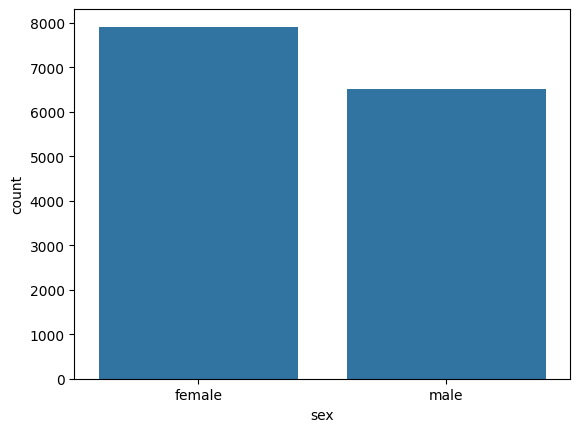

In [17]:
sns.countplot(data = welfare, x = 'sex')

*→ 성별 빈도 확인 및 막대그래프 그리기*

### 1-2. 월급 변수 검토 및 전처리 ###

In [18]:
welfare['income'].dtypes

dtype('float64')

In [19]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

*→ 변수 타입 및 요약통계량 파악*

<Axes: xlabel='income', ylabel='Count'>

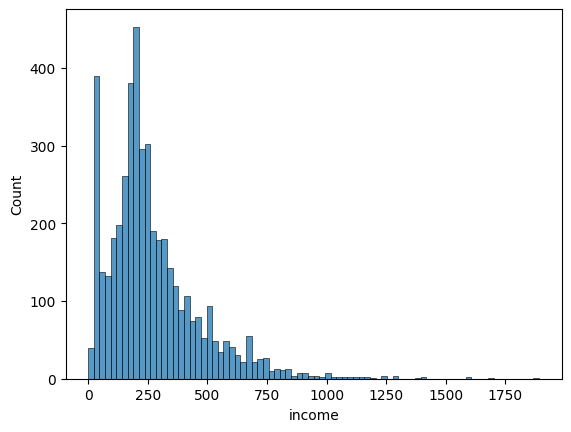

In [20]:
sns.histplot(data = welfare, x = 'income')

*→ 월급 히스토그램 만들기 (0~250만원에 가장 많은 분포 보임)* 

In [22]:
welfare['income'].isna().sum()

np.int64(9884)

*→ 결측치 9884개 존재하므로 분석 시 결측치 처리 필요 확인*

### 1-3. 성별에 따른 월급 차이 분석 ###

In [24]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


*→ 성별 월급 평균표 만들기 (남자 평균이 여자 평균보다 큼)*

<Axes: xlabel='sex', ylabel='mean_income'>

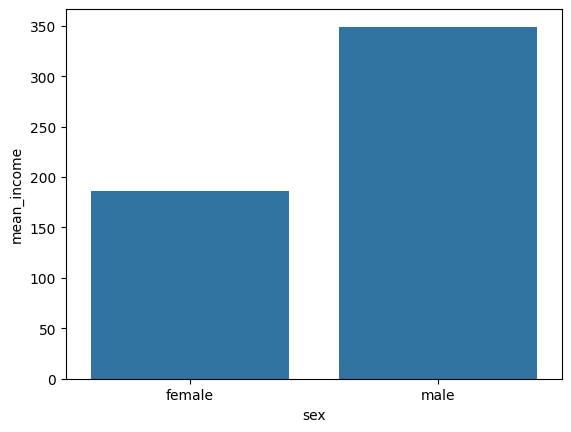

In [25]:
sns.barplot(data = sex_income, x='sex', y='mean_income')

*→ 막대그래프로 성별 별 월급 평균 차이 시각화 하기*

## 02. 나이와 월급의 관계 ##

### 2-1. 나이 변수 검토 및 전처리 ###

In [27]:
welfare['birth'].dtypes

dtype('float64')

In [28]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

*→ 변수 타입 및 요약통계량 파악(+이상치 확인)*

<Axes: xlabel='birth', ylabel='Count'>

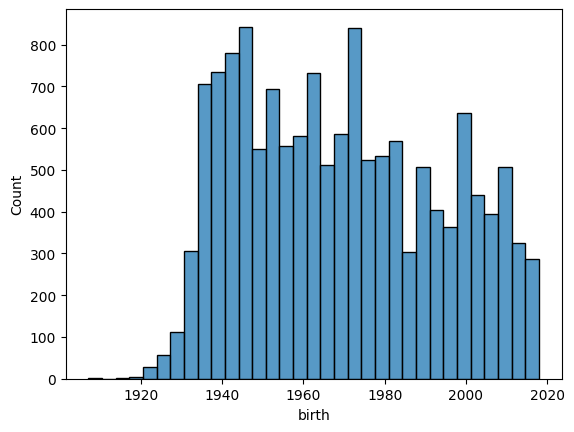

In [30]:
sns.histplot(data = welfare, x= 'birth')

*→ 히스토그램으로 분포 확인*

In [31]:
welfare['birth'].isna().sum()

np.int64(0)

*→ 결측치 확인 (이상치, 결측치 없으므로 파생변수 생성 가능)*

In [32]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

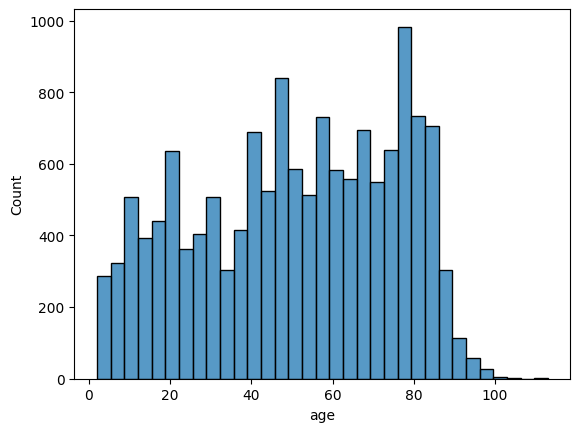

In [35]:
sns.histplot(data = welfare, x='age')

*→ birth 변수를 이용해 나이 파생변수 만들고 요약통계량과 히스토그램 확인하기*

### 2-2. 나이와 월급의 관계 분석 ###

In [36]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


*→ 나이에 따른 월급 평균표*

<Axes: xlabel='age', ylabel='mean_income'>

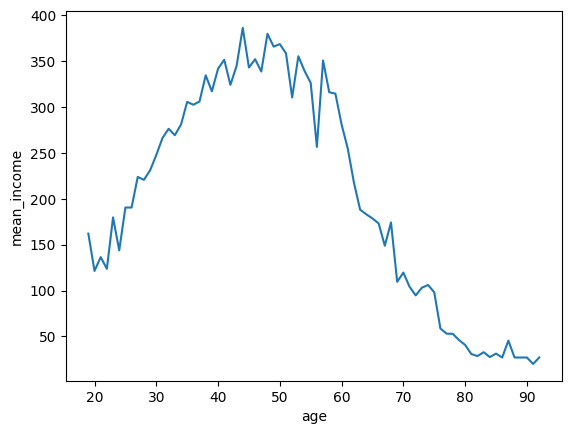

In [38]:
sns.lineplot(data = age_income, x='age', y='mean_income')

*→ 히스토그램 그리기 (40대를 기점으로 월급이 증가하다고 감소하는 추세 보임)*

## 3. 연령대에 따른 월급 차이 ##

### 3-1. 연령대 파생변수 만들기 ###

In [40]:
welfare = welfare.assign(ageg = np.where(welfare['age']<30, 'young',
                                np.where(welfare['age']<=59, 'middle',
                                                             'old')))
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

*→ 연령대 변수 만들고 각 범주 빈도 확인*

<Axes: xlabel='ageg', ylabel='count'>

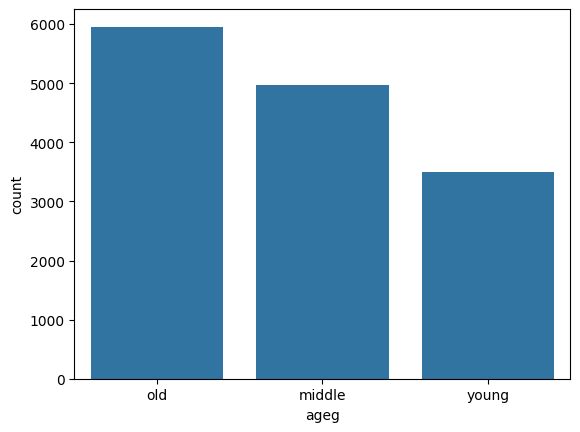

In [41]:
sns.countplot(data = welfare, x='ageg')

*→ 막대그래프 확인 (초년층, 중년층, 노년층 순서대로 범주 수 많음)*

### 3-2. 연령대에 따른 월급 차이 분석 ###

In [42]:
ageg_income = welfare.dropna(subset=['income']) \
                    .groupby('ageg', as_index=False) \
                    .agg(mean_income =('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


*→ 월급 평균표 만들기 (중년층, 초년층, 노년층 순서대로 월급 평균 높음)*

<Axes: xlabel='ageg', ylabel='mean_income'>

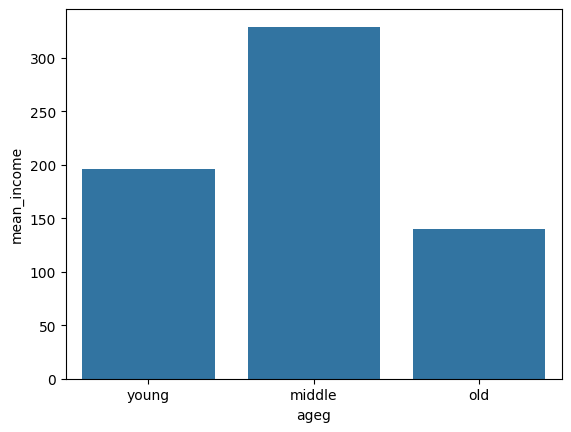

In [44]:
sns.barplot(data = ageg_income, x='ageg', y='mean_income',
            order=['young', 'middle', 'old'])

*→ order로 막대 정렬 순서 지정하여 막대그래프로 월급 차이 시각화*

## 04. 연령대 및 성별 월급 차이 ##

### 4-1. 연령대 및 성별에 따른 월급 차이 분석 ###

*→ 연령대, 성별, 월급 모두 앞에서 검토 및 전처리 했으므로 바로 분석 실행*

In [45]:
sex_income = \
    welfare.dropna(subset = ['income']) \
            .groupby(['ageg', 'sex'], as_index=False) \
            .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


*→ 연령대 및 성별에 따른 월급 평균표 확인*

<Axes: xlabel='ageg', ylabel='mean_income'>

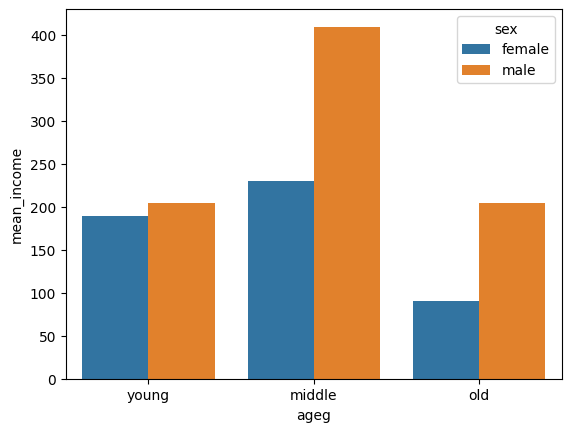

In [46]:
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex',
                order=['young', 'middle', 'old'])

*→ 막대그래프 그리기 (성별 월급 차이는 중년부터 크게 벌어지기 시작하며, 노년층에 월급이 줄어드는 정도가 여성이 훨씬 심함을 확인)*

## 05. 직업별 월급 차이 ##

### 5-1. 직업 변수 검토 및 전처리 ###

In [47]:
welfare['code_job'].dtypes

dtype('float64')

In [48]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
784.0      2
122.0      2
861.0      1
423.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [55]:
welfare['code_job'].describe()

count    6878.00000
mean      587.54827
std       264.23507
min       111.00000
25%       313.00000
50%       611.00000
75%       873.00000
max      1009.00000
Name: code_job, dtype: float64

*→ 직업 변수의 변수 타입과 코드별 빈도 확인*

In [49]:
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [50]:
list_job.shape

(156, 2)

*→ 코드별 직업이름 정보가 있는 코드북 불러온 후 행/열 정보 확인*

In [51]:
welfare = welfare.merge(list_job, how='left', on='code_job')

*→ list_job을 code_job을 기준으로 welfare에 병합*

In [54]:
welfare.dropna(subset=['code_job']) \
        [['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


*→ code_job 결측치 제거 후 코드별 직업명 확인*

### 5-2. 직업별 월급 차이 분석 ###

In [56]:
job_income = welfare.dropna(subset=['job', 'income']) \
                    .groupby('job', as_index=False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


*→ 직업별 월급 평균표 만들기 (무직이거나 월급 받지 않는 사람, 즉 결측치는 제거하고 표 만들기)*

In [57]:
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


<Axes: xlabel='mean_income', ylabel='job'>

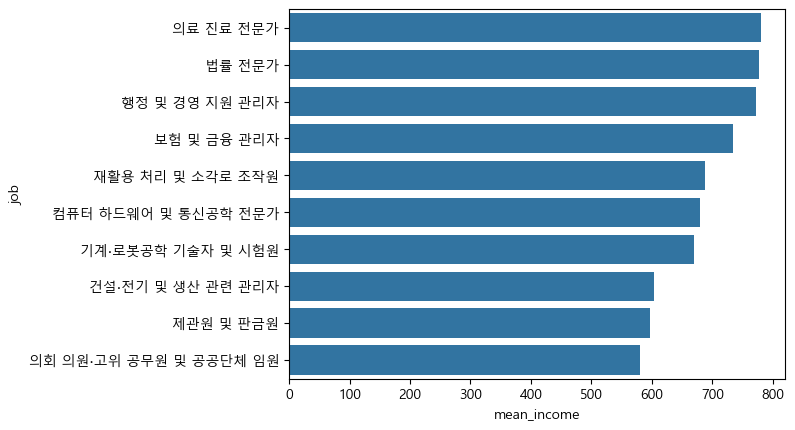

In [59]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

sns.barplot(data=top10, y='job', x='mean_income')

*→ 월급 상위 10개 직업을  top10으로 추출 후 그래프 그리기*

In [60]:
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
126,채굴 및 토목 관련 기능 종사자,140.000000
139,학예사∙사서 및 기록물 관리사,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

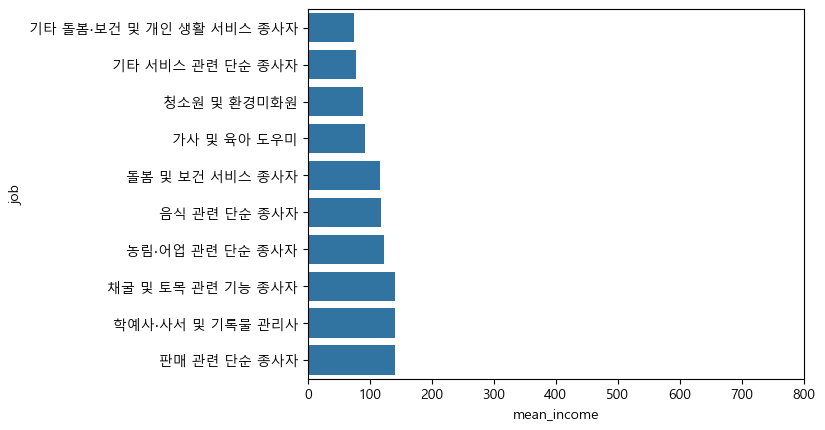

In [61]:
sns.barplot(data=bottom10, y='job', x='mean_income') \
    .set(xlim = [0, 800])

*→ 월급 하위 10개 직업을 bottom10으로 추출 후 그래프 그리기*

## 06. 성별 직업 빈도 ##

*→ 성별, 직업 변수는 앞에서 검토 및 전처리 했으므로 생략*

### 6-1. 성별 직업 빈도 분석 ###

In [63]:
job_male = welfare.dropna(subset=['job']) \
                    .query('sex == "male"') \
                    .groupby('job', as_index=False) \
                    .agg(n=('job', 'count')) \
                    .sort_values('n', ascending=False) \
                    .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [64]:
job_female = welfare.dropna(subset=['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index=False) \
                    .agg(n=('job', 'count')) \
                    .sort_values('n', ascending=False) \
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


*→ 남성, 여성 각각의 직업별 빈도 상위 10개를 male과 female로 추출하기*

[(0.0, 500.0)]

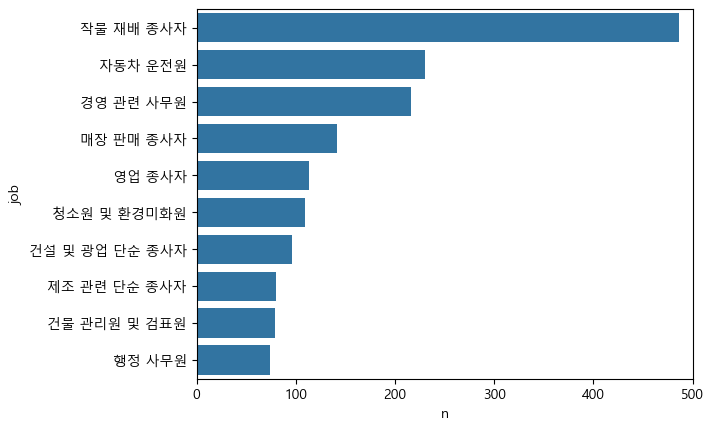

In [65]:
sns.barplot(data=job_male, y='job', x='n').set(xlim=[0, 500])

[(0.0, 500.0)]

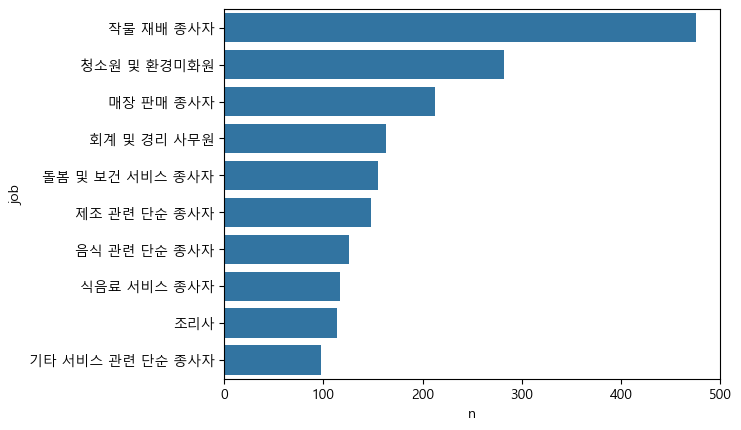

In [66]:
sns.barplot(data=job_female, y='job', x='n').set(xlim=[0, 500])

*→ 추출한 male과 female 데이터로 그래프 그리기 (두 그래프 비교 위해 x축 범위 통일)*

*→ 확인 결과 남녀 모두 '작물 재배 종사자'의 직업 빈도가 가장 높음*

## 07. 지역별 연령대 비율 ##

### 7-1. 지역 변수 검토 및 전처리 ###

In [67]:
welfare['code_region'].dtypes

dtype('float64')

In [68]:
welfare['code_region'].value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

*→ 지역 변수의 변수 타입 및 코드별 빈도 구하기*

In [69]:
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region' : ['서울',
                                        '수도권(인천/경기)',
                                        '부산/경남/울산',
                                        '대구/경북',
                                        '대전/충남',
                                        '강원/충북',
                                        '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


*→ 코드북을 참고하여 코드별 지역명 정보가 있는 df 만들기*

In [70]:
welfare = welfare.merge(list_region, how='left', on='code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


*→ welfare에 code_region을 기준으로 list_region 병합*

### 7-2. 지역별 연령대 비율 분석 ###

In [71]:
region_ageg = welfare.groupby('region', as_index=False) \
                    ['ageg'] \
                    .value_counts(normalize=True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


*→ 병합한 데이터를 이용해 지역별 연령대 비율표 만들기*

In [72]:
region_ageg = \
    region_ageg.assign(proportion = region_ageg ['proportion']*100) \
                .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


*→ proportion을 백분율로 바꾸고 소수점 반올림한 지역별 연령대 비율표*

<Axes: xlabel='proportion', ylabel='region'>

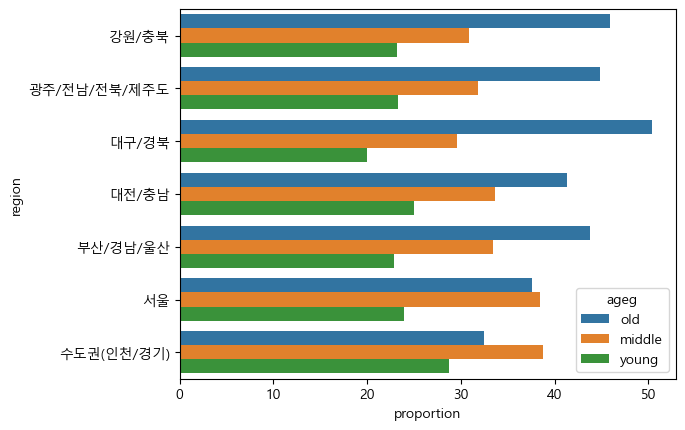

In [73]:
sns.barplot(data = region_ageg, y='region', x='proportion', hue='ageg')

*→ 비율표를 이용해 그래프 그리기 (아직 각 지역 연령대별 비율이 서로 다른 막대로 표현되어 지역 간 비교 어려움)*

In [74]:
pivot_df = \
    region_ageg[['region', 'ageg', 'proportion']].pivot(index='region', 
                                                        columns='ageg',
                                                        values='proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


*→ 누적비율 막대그래프에 필요한 변수를 추출하여 행/열을 회전한 피벗 df 생성*

<Axes: ylabel='region'>

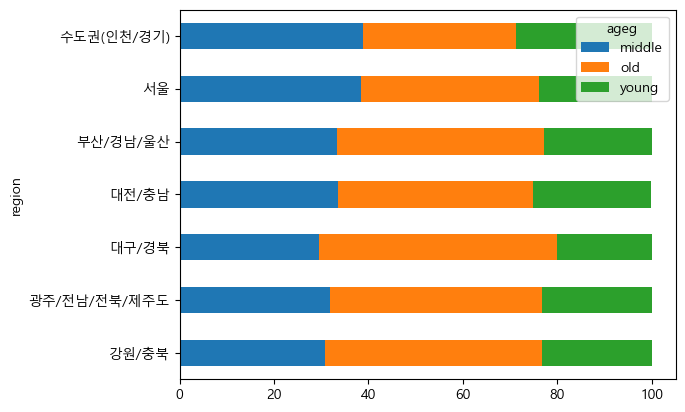

In [ ]:
pivot_df.plot.barh(stacked=True)

*→ 피벗df를 이용하여 누적비율 막대그래프 그리기*

In [76]:
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


*→ 막대를 노년층 비율 순으로 정렬: sort_values('old)*

*→ 막대 색을 연령대 순으로 정렬: [['young', 'middle', 'old']]*

<Axes: ylabel='region'>

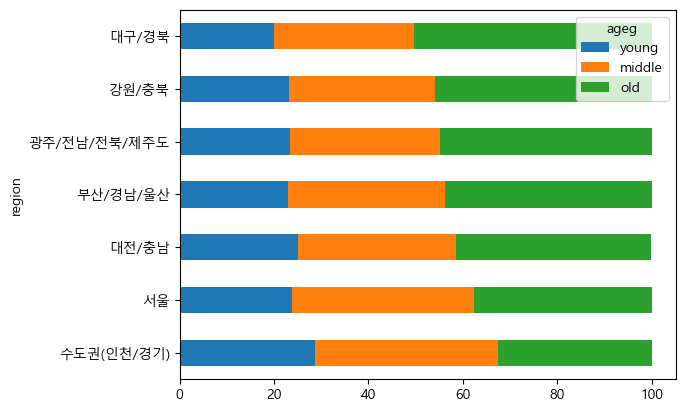

In [77]:
reorder_df.plot.barh(stacked=True)

*→ 정렬된 누적비율 막대그래프 그리기 성공~*

*→ 대구/경북의 노년층 비율이 가장 높음*